# Fourier Transform
***

The fast Fourier transform (FFT) is an efficient algorithm for calculating the discrete Fourier transform (DFT) of a sequence of samples. It converts an array of samples in the time domain into an array of complex numbers in the frequency domain, with the same size as the input array.


The FFT allows for faster computation of the DFT, which is useful for signal processing applications where the DFT needs to be computed repeatedly or for larger input sizes.

This is the equation for the discrete Fourier transform [0]:<br>
$
y[k] = \sum_{n=0}^{N-1}
e^{-2 \pi j \frac{kn}{N}} x[n]
$

***
### Fast Fourier Transform

Instead of writing your own implementation of the FFT, you can use the FFT function provided by `scipy` module (`scipy.fft.fft`), there is also an implementation in the `numpy` library (`numpy.fft.fft`).
Both of these implementations  have been fine-tuned for high performance.

In [1]:
import random
import numpy, numpy.fft, scipy.fft

rand_number_array = numpy.array([random.random() for i in range(4)])
print(rand_number_array)

[0.22562341 0.80862524 0.85586645 0.12572417]


In [2]:
print(numpy_fft_output := numpy.fft.fft(rand_number_array))
print(scipy_fft_output := scipy.fft.fft(rand_number_array))

[ 2.01583927+0.j         -0.63024304-0.68290107j  0.14714044+0.j
 -0.63024304+0.68290107j]
[ 2.01583927-0.j         -0.63024304-0.68290107j  0.14714044-0.j
 -0.63024304+0.68290107j]


### Inverse Fast Fourier Transform

The inverse works how you would expect it too, you can convert the output of the FFT back into its original form, although the return value is of the complex type, it is trivial to extract the real part, which I demonstrate below.

In [3]:
print(numpy_ifft_output := numpy.fft.ifft(numpy_fft_output))
print(scipy_ifft_output := scipy.fft.ifft(scipy_fft_output))

[0.22562341+0.j 0.80862524+0.j 0.85586645+0.j 0.12572417+0.j]
[0.22562341+0.j 0.80862524+0.j 0.85586645-0.j 0.12572417+0.j]


In [4]:
print([i.real for i in numpy_ifft_output])
print([i.real for i in scipy_ifft_output])

[0.22562341115443035, 0.8086252421170004, 0.8558664472383068, 0.12572417309442702]
[0.22562341115443035, 0.8086252421170004, 0.8558664472383068, 0.12572417309442702]


In [5]:
print("Did inverse FFT work correctly?:", all(numpy.isclose(rand_number_array, numpy_ifft_output)))

Did inverse FFT work correctly?: True


***
## 1. Time vs Frequency Domain

Time and frequency are two different ways of representing and analyzing signals. A signal is a sequence of data that varies over time, such as the intensity (loudness) and pitch (frequency) of sound. Time and frequency are important for understanding how a signal changes over time and for identifying the different components of a signal.

For example, a signal can be represented in the time domain by plotting its values over time, or it can be transformed into the frequency domain to reveal the different frequency components that make up the signal.

***
## 2. Implementation of the DFT Algorithm

Here is an implementation of the discrete Fourier transform (DFT)[0] algorithm in Python.

In [6]:
def dft(x_array):
    N = len(x_array) # Size of input
    
    # Pre-allocate the output array
    y_array = [*range(N)]

    # Loop for every element in the array
    for k in range(N):
        y_k = 0
        for n in range(N):
            y_k += (np.e ** (-2 * np.pi * 1j * k * n / N) * x_array[n])
        y_array[k] = y_k
        
    return y_array

## 3. Generating a sinusoidal signal

A sinusoidal signal commonly known as sine-wave can be describe by the following properties:
frequency, amplitute and phase shift.

A sinusoidal signal can be describe using:

$
x(t) = A
\sin(2 \pi f t + p)
$

- $t$ = Time in seconds
- $A$ = signal_amplitude
- $f$ = signal_frequency
- $t$ = Time in seconds
- $p$ = phase_shift

In [7]:
import random
import numpy as np

# Number of samples to generate
sample_count = random.randint(100, 200)

# Spaces between the samples
sample_interval = 1 / sample_count

# Generate time vector from 0 to 1 wih sample_interval intervals
time_vector = np.arange(0, 1, sample_interval)

signal_frequency = 10

signal_amplitude = 1

phase_shift = 0

# Generating the sinusoidal signal
my_signal = signal_amplitude * np.sin(2 * np.pi * signal_frequency * time_vector + phase_shift)

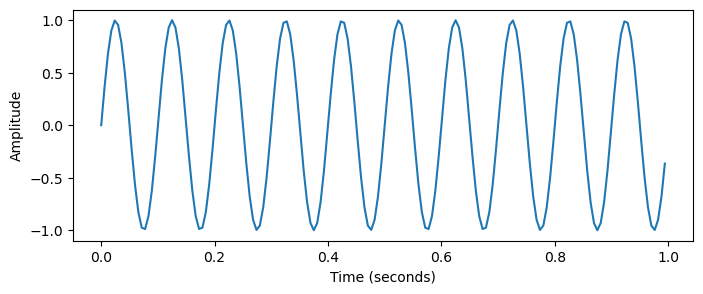

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 3))
ax.set_xlabel("Time (seconds)")
ax.set_ylabel("Amplitude")

# Plot the time-domain signal
ax.plot(time_vector, my_signal)
plt.show()

***
### Converting to Frequency Domain

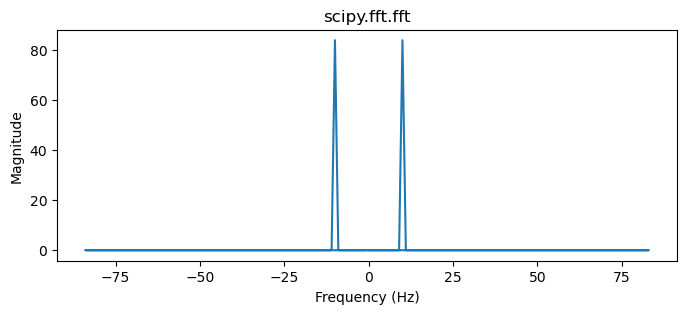

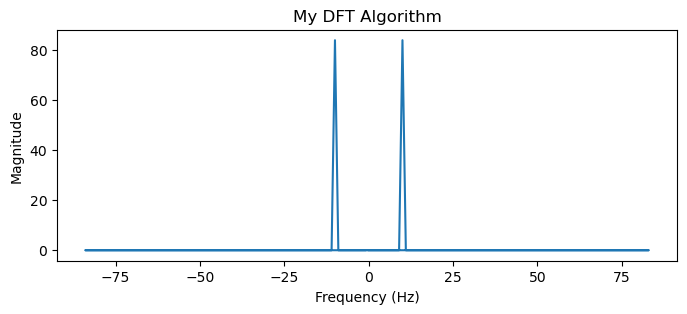

In [9]:
import scipy.fft

dft_algorithm_list = [
    (scipy.fft.fft, "scipy.fft.fft"),
    (dft, "My DFT Algorithm")
]

# Iterate over the list of DFT algorithms
for func, title in dft_algorithm_list:
    # Calculate the frequency domain using the current DFT function
    frequency_domain = np.abs(func(my_signal))
    
    # Calculate the frequency vector using the sampling interval
    frequency_vector = scipy.fft.fftfreq(time_vector.shape[-1], sample_interval)

    # Plot the frequency domain
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_title(title)
    ax.plot(frequency_vector, frequency_domain)
    plt.show()

## 4. Plots of Parabolas

A parabola is a curve that has a symmetrical U-shape it can either curve upwards or downwards, depending on what quadratic function was plotted.
Any quadratic function will produce a parabola when plotted.

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
quadratic_func_list = [
    lambda x: x ** 2,
    lambda x: (x ** 2) - 4,
    lambda x: (x ** 2) + 4,
    lambda x: (-x ** 2) + 4
]

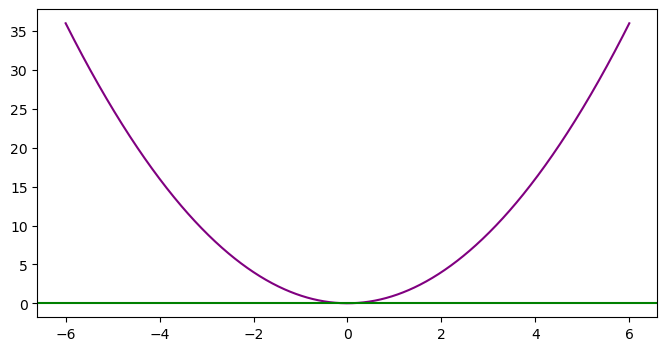

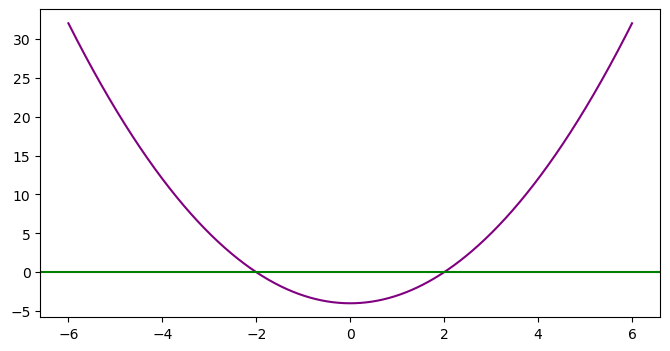

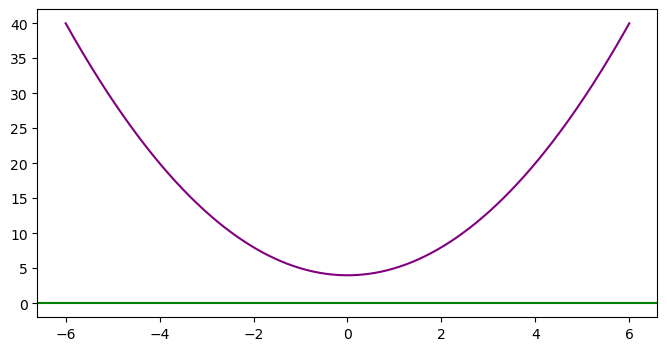

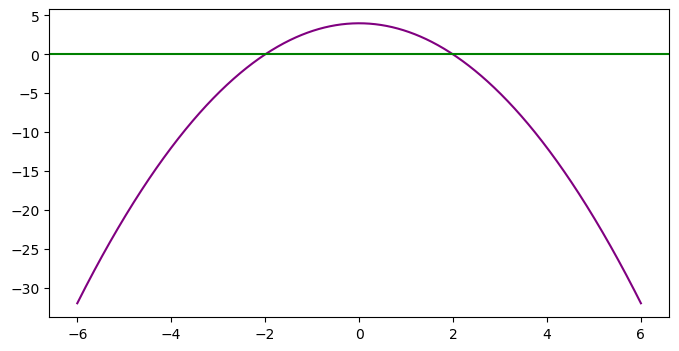

In [15]:
# Range of x values.
x = np.linspace(-6.0, 6.0, 1000)

for quadratic_func in quadratic_func_list:
    # Create figure.
    fig, ax = plt.subplots(figsize=(8,4))

    # Plot using matplotlib.
    ax.plot(x, quadratic_func(x), color="purple")

    # Plot x axis.
    ax.axhline(0.0, color="green");

## 5. Quadratic Formula

The following is the form that a quadratic equation must take, its a polynomial with three parts:

$f(x): ax^2 + bx + c$

The quadratic formula is used to find the two values of x of a quadratic function, the roots will satisfy the function.

# References

[0] https://github.com/ianmcloughlin/2223-S1-emerging-technologies/blob/main/notebooks/04-fourier-transform.ipynb<br>
[1] https://en.wikipedia.org/wiki/Fourier_transform<br>
[2] https://en.wikipedia.org/wiki/Fast_Fourier_transform<br>
[3] https://en.wikipedia.org/wiki/Sinusoidal_wave<br>
[4] https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft.html<br>